# Carbon Dating

The Carbon isotope ${}^{14}_6C$ is widely used for dating of ancient artifacts containing biological material. It undergoes $\beta^-$ decay with a half-life time of $T_{1/2}=5700$ years. Suppose an ancient artifact originally contained $10^{-12}$ kg of ${}^{14}_6C$. The number of particles decreases with time:
$$
N=N_0exp(-t/\tau),
$$
where $\tau$ is the decay constant. Half-life time means the time has passed when the number of particles decreases to half of the initial. The we have:
$$
\frac{N_0}{2}=N_0exp(-T_{\frac{1}{2}}/\tau)\\
\frac{1}{2}=exp(-T_{\frac{1}{2}}/\tau)\\
\tau=T_{\frac{1}{2}}/ln(2)
$$


(1 mol of a substance, which has a mass corresponding to the atomic mass-number in grams, contains $N_A=6.022\times10^{23}$ particles)

Numerically calculate the activity of the sample, defined as 
$$R(t)=-dN/dt=N/\tau$$
over a duration of 20,000 years. Use numerical time-step widths of 10 and 100 years.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
mass = 10**(-9) # mass of 14C in grams
mol_mass = 14  # molar mass of 14C in gram/molar
NA = 6.022*(10**23) # Avogadro's constant
N0 = mass*NA/mol_mass # initial amount of 14C
tau = 5700/np.log(2)

dt1 = 10 # in years
dt2 = 100 
dt3 = 1000
tmax = 20000

def decaying(N0, dt, tau, tmax):
    time_step = np.arange(0, tmax+dt, dt)
    length = len(time_step)
    N = np.zeros(length)
    N[0] = N0
    for i in range(1,length):
        N[i] = N[i-1] - N[i-1]/tau*dt
    return time_step, N        

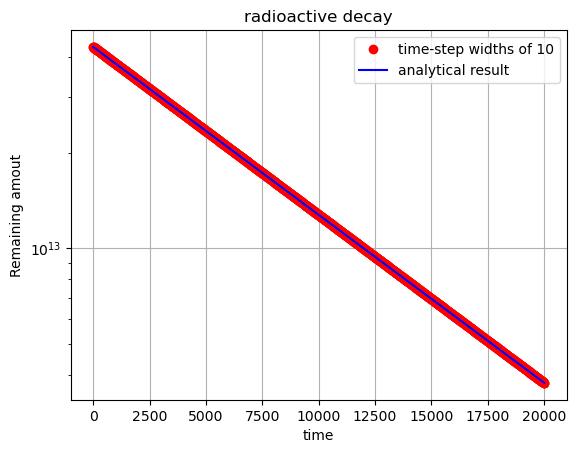

In [60]:
t1, N1 = decaying(N0, dt1, tau, tmax)
plt.semilogy(t1, N1, 'or', t1, N0*np.exp(-t1/tau), '-b')
plt.xlabel('time')
plt.ylabel('Remaining amout')
plt.title('radioactive decay')
plt.legend(['time-step widths of 10', 'analytical result'])
plt.grid()
plt.show()

The numerical results and the exact (analytical) solution are plotted together. When the time-step widths is short (10 years), the numerical result and analytical result are almost the same. When the time-step widths increases to 100 years, the difference between the numerical and analytical results are still not easity noticeable. 

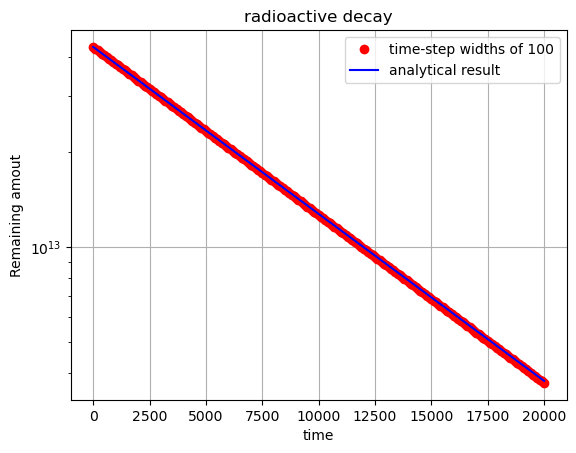

In [61]:
t2, N2 = decaying(N0, dt2, tau, tmax)
plt.semilogy(t2, N2, 'or', t2, N0*np.exp(-t2/tau), '-b')
plt.xlabel('time')
plt.ylabel('Remaining amout')
plt.title('radioactive decay')
plt.legend(['time-step widths of 100', 'analytical result'])
plt.grid()
plt.show()

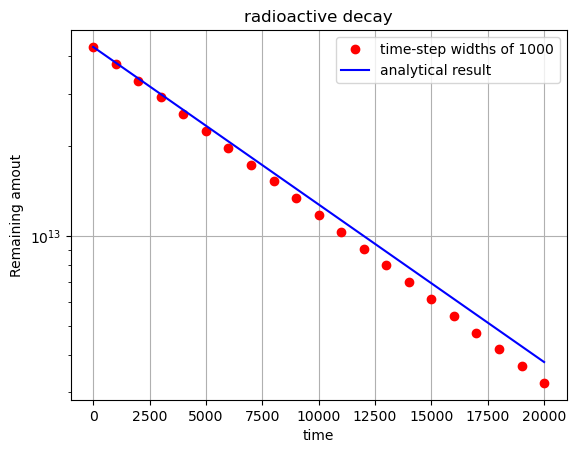

In [62]:
t3, N3 = decaying(N0, dt3, tau, tmax)
plt.semilogy(t3, N3, 'or', t3, N0*np.exp(-t3/tau), '-b')
plt.xlabel('time')
plt.ylabel('Remaining amout')
plt.title('radioactive decay')
plt.legend(['time-step widths of 1000', 'analytical result'])
plt.grid()
plt.show()

when the time-step widths increases to $\Delta t=1,000$ years, the accuracy of numerical solution is not acceptable anymore. Taking the time $t=12,000$ years as an example, we can obtain the corresponding percentage deviation which is 9.2% and cannot be ignorable. 

In [65]:
Error = abs(N3[12]-N0*np.exp(-12000/tau))/(N0*np.exp(-12000/tau))
print(Error)

0.09212304381609213


The neglected 2nd order term in Taylor expansion at time $t=12000$ years can be calculated as the following way:
$$
\frac{1}{2}\frac{d^2N}{dt^2}|_{t=0}(\Delta t)^2=\frac{N_0}{2}(\frac{\Delta t}{\tau})^2.
$$
Therefore the percentage error is

$$
PError=\frac{\frac{1}{2}\frac{d^2N}{dt^2}|_{t=0}(\Delta t)^2}{N|_{t=\Delta t}}
=\frac{\frac{N_0}{2}(\frac{\Delta t}{\tau})^2}{N_0exp(-\Delta t/\tau)}
=\frac{(\frac{\Delta t}{\tau})^2exp(\Delta t/\tau)}{2}
$$
Accumulating this error step by step, we have the percentage error at time $t=12000$ years as
$$
PError|_{t=12000}=1-(1-PError)^{t/\Delta t}\approx 9.5\%
$$
As a consequence, the deviation from the exact result is very close to the neglected 2nd order terms. 

In [70]:
def decaying_2nd(N0, dt, tau, tmax):
    time_step = np.arange(0, tmax+dt, dt)
    length = len(time_step)
    N = np.zeros(length)
    N[0] = N0
    for i in range(1,length):
        N[i] = N[i-1] - N[i-1]/tau*dt + N[i-1]/2*(dt/tau)**2
    return time_step, N

By taking the 2nd order term into consideration, we could define an imporved decaying function, with which the long time-step widths $t=12000$ also works pretty well. 

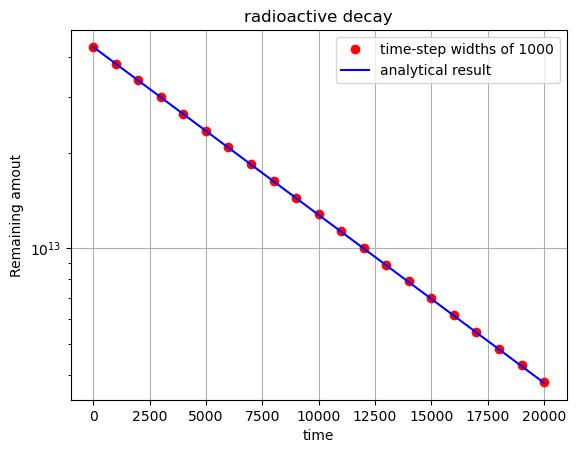

In [71]:
t3, N3 = decaying_2nd(N0, dt3, tau, tmax)
plt.semilogy(t3, N3, 'or', t3, N0*np.exp(-t3/tau), '-b')
plt.xlabel('time')
plt.ylabel('Remaining amout')
plt.title('radioactive decay')
plt.legend(['time-step widths of 1000', 'analytical result'])
plt.grid()
plt.show()